In [46]:
#pip install seaborn
# pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
import pandas as pd
dataset= pd.read_csv('D:\Downloads\dataset\dataset\cancerdata.csv')
dataset.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [34]:
dataset.shape

(340, 32)

In [35]:
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [36]:
dataset['diagnosis'].replace(['M','B'],[1,0],inplace=True)
dataset.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
335    1
336    0
337    1
338    0
339    1
Name: diagnosis, Length: 340, dtype: int64

C:\Users\Swaraj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    183
1    157
Name: diagnosis, dtype: int64

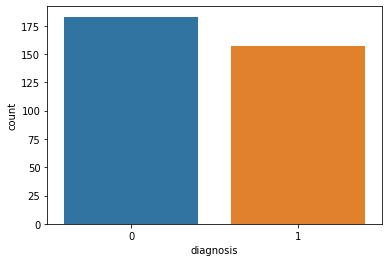

In [42]:
sns.countplot(dataset['diagnosis'])
dataset['diagnosis'].value_counts()

<AxesSubplot:>

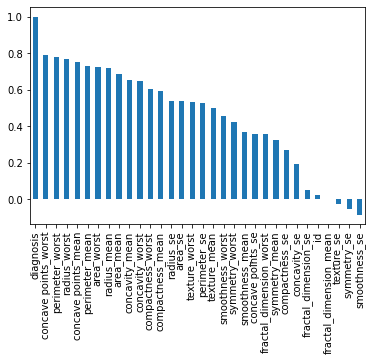

In [43]:
#Plot correlations with diagnosis column
corr = dataset.corr()['diagnosis'].sort_values(ascending=False)
corr.plot(kind='bar')

diagnosis               1.000000
concave points_worst    0.793563
perimeter_worst         0.778990
radius_worst            0.771264
concave points_mean     0.754754
perimeter_mean          0.731784
area_worst              0.723991
radius_mean             0.718806
Name: diagnosis, dtype: float64


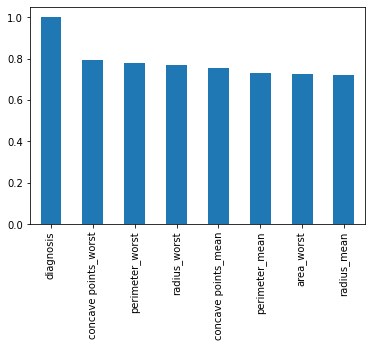

In [44]:
#Plot only correlations greater than 0.7
corr[corr >= 0.7].plot(kind='bar')
print(corr[corr >= 0.7])

<AxesSubplot:>

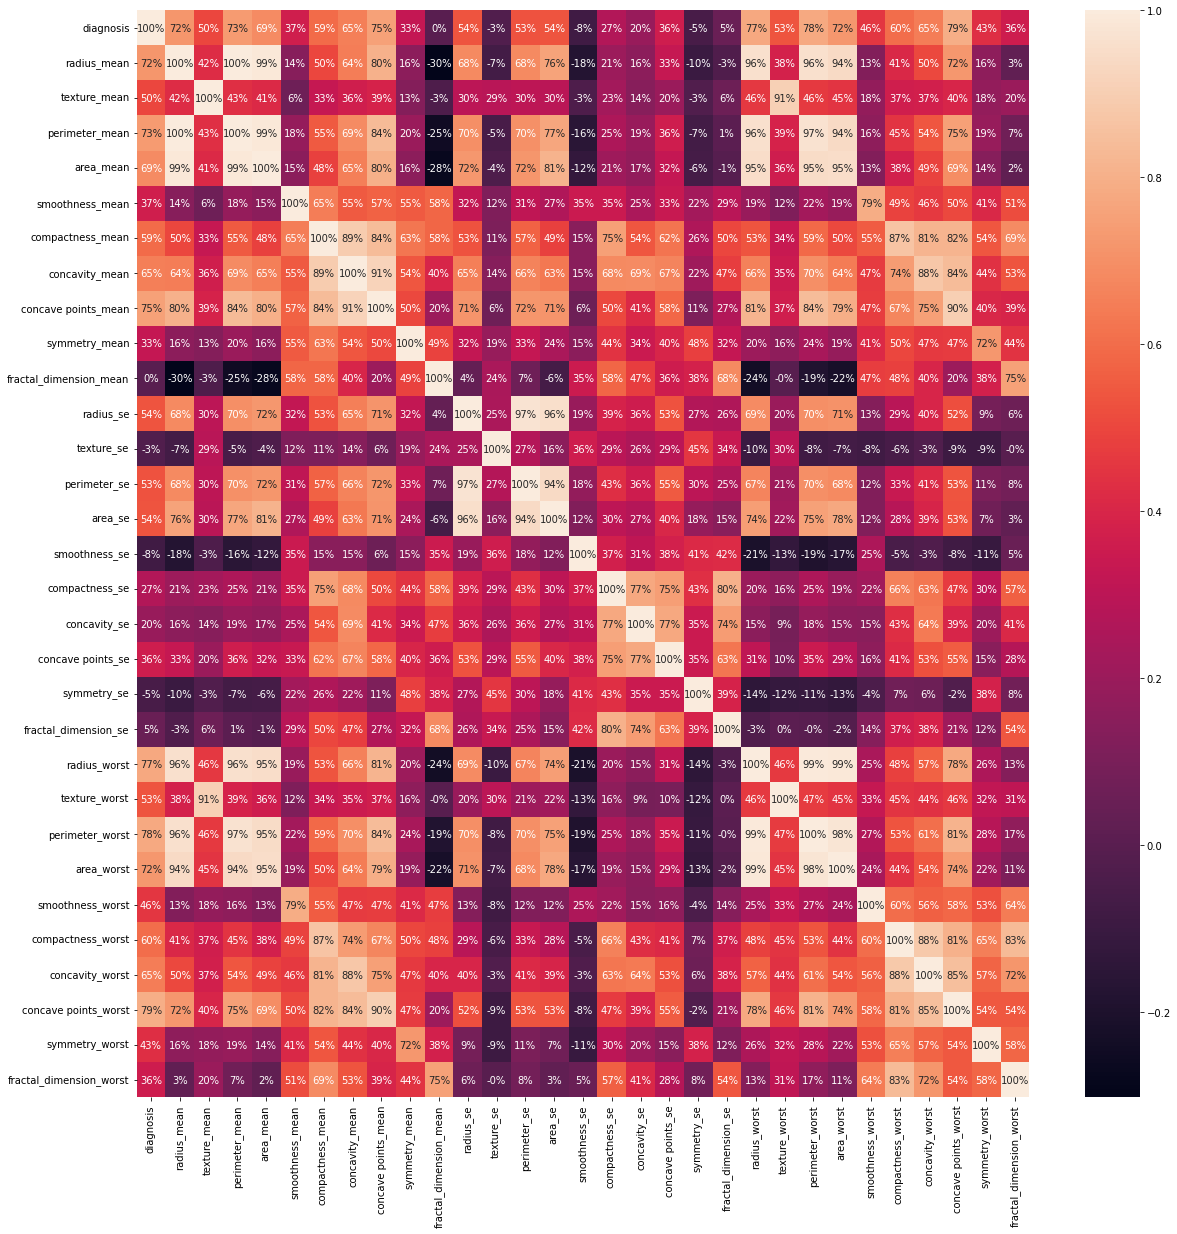

In [52]:
#plot correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(dataset.iloc[:,1:32].corr(), annot=True, fmt='.0%')

In [3]:
dataset.drop(['id'],axis=1,inplace=True)

In [5]:
dataset['diagnosis'] =  pd.get_dummies(dataset['diagnosis'],drop_first=True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
X = dataset.drop('diagnosis',axis=1)
y = dataset['diagnosis']

In [9]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [10]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
#Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled,y_train)
lin_reg_pred = linear_model.predict(X_test_scaled)
lin_reg_pred = np.array(list(map(lambda x : 1 if(x>0.5) else 0,lin_reg_pred)))

In [14]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled,y_train)
log_reg_pred = logistic_model.predict(X_test_scaled)

In [15]:
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train_scaled,y_train)
svm_pred = svm_model.predict(X_test_scaled)

In [22]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled,y_train)
dt_pred = dt_model.predict(X_test_scaled)

In [25]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled,y_train)
rf_pred = dt_model.predict(X_test_scaled)

In [18]:
print("Classification Report using Linear Regression Model \n")
print(classification_report(y_test,lin_reg_pred))

print("\nConfustion matrix using Linear Regression Model\n")
print(confusion_matrix(y_test,lin_reg_pred))
print("-"*100)
print("\nAccuracy Score using Linear Regression Model :",accuracy_score(y_test,lin_reg_pred))
print()

Classification Report using Linear Regression Model 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.90      0.96      0.93        27

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68


Confustion matrix using Linear Regression Model

[[38  3]
 [ 1 26]]
----------------------------------------------------------------------------------------------------

Accuracy Score using Linear Regression Model : 0.9411764705882353



In [19]:
print("Classification Report \nLinear Regression Model \n")
print(classification_report(y_test,lin_reg_pred))

Classification Report 
Linear Regression Model 

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        41
           1       0.90      0.96      0.93        27

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68



In [20]:
print("Classification Report \nLogistic Regression Model \n")
print(classification_report(y_test,log_reg_pred))

Classification Report 
Logistic Regression Model 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        41
           1       0.96      1.00      0.98        27

    accuracy                           0.99        68
   macro avg       0.98      0.99      0.98        68
weighted avg       0.99      0.99      0.99        68



In [21]:
print("Classification Report \nSupport Vector Machine \n")
print(classification_report(y_test,svm_pred))

Classification Report 
Support Vector Machine 

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.93      1.00      0.96        27

    accuracy                           0.97        68
   macro avg       0.97      0.98      0.97        68
weighted avg       0.97      0.97      0.97        68



In [23]:
print("Classification Report \nDecision Tree \n")
print(classification_report(y_test,dt_pred))

Classification Report 
Decision Tree 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.85      0.85      0.85        27

    accuracy                           0.88        68
   macro avg       0.88      0.88      0.88        68
weighted avg       0.88      0.88      0.88        68



In [26]:
print("Classification Report \n Random Forest \n")
print(classification_report(y_test,rf_pred))

Classification Report 
 Random Forest 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.85      0.85      0.85        27

    accuracy                           0.88        68
   macro avg       0.88      0.88      0.88        68
weighted avg       0.88      0.88      0.88        68

